Week2:Basic Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
# Load dataset (make sure file is in same folder as notebook)
df = pd.read_csv("Cleaned_dataset.csv")
print("Dataset Loaded:", df.shape)


Dataset Loaded: (1300, 6)


In [14]:
import pandas as pd

baseline = pd.Series(y_train).value_counts().max() / len(y_train)
print("Baseline Accuracy:", baseline)


Baseline Accuracy: 0.25


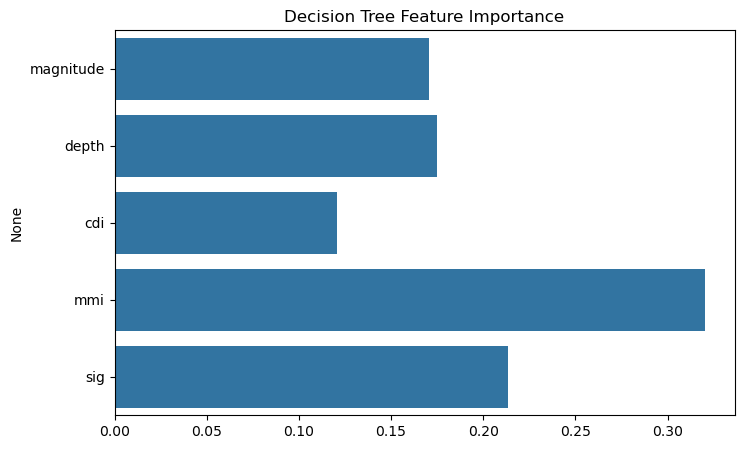

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=dt.feature_importances_, y=X.columns)
plt.title("Decision Tree Feature Importance")
plt.show()


In [7]:
preferred = ['alert','Alert','label','Label','class','Class','target']
target = None
for col in preferred:
    if col in df.columns:
        target = col
        break

if target is None:
    small_unique = [c for c in df.columns if df[c].nunique() <= 10]
    target = small_unique[0] if small_unique else df.columns[-1]

print("Target column:", target)

Target column: alert


In [8]:
# ---- X and y ----
y = df[target]
X = df.drop(columns=[target])

if y.dtype == 'object':
    y = pd.factorize(y)[0]

if df[target].nunique() > 10:
    median_val = df[target].median()
    y = (df[target] > median_val).astype(int)


In [9]:
# Preprocess
X = pd.get_dummies(X, drop_first=True)

for col in X.columns:
    if X[col].isnull().sum() > 0:
        if np.issubdtype(X[col].dtype, np.number):
            X[col].fillna(X[col].median(), inplace=True)
        else:
            X[col].fillna(X[col].mode()[0], inplace=True)

num_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_log = logreg.predict(X_test)



In [12]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [13]:
# Metrics
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, pred_log))
print("MAE:", mean_absolute_error(y_test, pred_log))
print(classification_report(y_test, pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_log))

print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("MAE:", mean_absolute_error(y_test, pred_dt))
print(classification_report(y_test, pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dt))


--- Logistic Regression ---
Accuracy: 0.6307692307692307
MAE: 0.4307692307692308
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        65
           1       0.44      0.51      0.47        65
           2       0.60      0.43      0.50        65
           3       0.71      0.80      0.75        65

    accuracy                           0.63       260
   macro avg       0.63      0.63      0.63       260
weighted avg       0.63      0.63      0.63       260

Confusion Matrix:
 [[51 12  1  1]
 [14 33 10  8]
 [ 0 25 28 12]
 [ 0  5  8 52]]

--- Decision Tree ---
Accuracy: 0.8423076923076923
MAE: 0.19615384615384615
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.78      0.83      0.81        65
           2       0.83      0.82      0.82        65
           3       0.86      0.92      0.89        65

    accuracy                           0.84       260


In [17]:
# ---- PREDICTION ON 5 NEW INPUTS ----
print("\n--- Predicting on 5 New Samples ---")

sample_input = pd.DataFrame([
    {'magnitude': 5.0, 'depth': 10.0, 'cdi': 3.0, 'mmi': 4.0, 'sig': 50.0}, 
    {'magnitude': 6.2, 'depth': 20.0, 'cdi': 5.0, 'mmi': 3.0, 'sig': 80.0},
    {'magnitude': 4.5, 'depth': 15.0, 'cdi': 2.0, 'mmi': 2.0, 'sig': 10.0},
    {'magnitude': 7.1, 'depth': 8.0,  'cdi': 7.0, 'mmi': 6.0, 'sig': 120.0},
    {'magnitude': 5.8, 'depth': 12.0, 'cdi': 4.0, 'mmi': 5.0, 'sig': 60.0}
])

for col in X.columns:
    if col not in sample_input.columns:
        sample_input[col] = 0

sample_input = sample_input[X.columns]


sample_input[num_cols] = scaler.transform(sample_input[num_cols])

log_preds = logreg.predict(sample_input)
dt_preds = dt.predict(sample_input)

print("Logistic Regression Predictions:", log_preds)
print("Decision Tree Predictions:", dt_preds)



--- Predicting on 5 New Samples ---
Logistic Regression Predictions: [2 2 2 3 2]
Decision Tree Predictions: [2 2 2 2 2]
